### 영상 및 비디오 입출력

### 필요한 라이브러리 설치

In [1]:
!python -m pip install upgrade pip
!pip install opencv-python
!pip install matplotlib
!pip install pillow

  ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade


### 영상 입출력과 디스플레이

In [2]:
import cv2
import matplotlib.pyplot as plt
import time 
import ipywidgets as widgets 
import IPython.display as display 
import copy

imageFile = './data/lena.jpg'
img = cv2.imread(imageFile) # Read image Color
img2 = cv2.imread(imageFile,cv2.IMREAD_GRAYSCALE) # Read image Gray

img3 = plt.imread(imageFile) # Read image by pyplot

#Color Image
# openCV는 BGR로 사용하지만, Matplotlib는 RGB로 이미지를 보여주기 때문에 같은 Image를 읽어도 결과가 다르다.
#즉 Color Image를 읽는 경우에는 바꾸어서 결과를 출력해줘야 한다.
print('Color OpenCV')
print(img)

print('-'*30)

print('Color Matplotlib')
print(img3)

print('-'*30)

print('GrayScale OpenCV')
print(img2)

Color OpenCV
[[[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 ...

 [[ 60  18  84]
  [ 60  18  84]
  [ 58  27  92]
  ...
  [ 84  73 173]
  [ 76  68 172]
  [ 79  62 177]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]]
------------------------------
Color Matplotlib
[[[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]

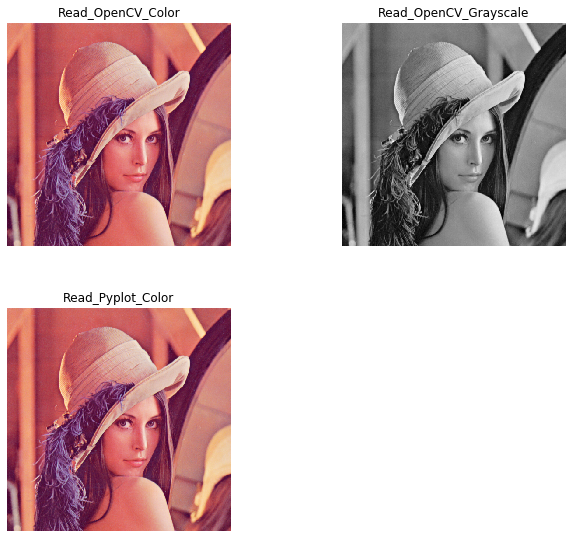

In [3]:
#출력 크기 조정
plt.figure(figsize=(10,10))

OpenCV_Color = plt.subplot(2,2,1)
OpenCV_Color.set_title('Read_OpenCV_Color')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

OpenCV_Grayscale = plt.subplot(2,2,2)
OpenCV_Grayscale.set_title('Read_OpenCV_Grayscale')
plt.axis('off')
plt.imshow(img2, cmap="gray")

Read_Pyplot_Color = plt.subplot(2,2,3)
Read_Pyplot_Color.set_title('Read_Pyplot_Color')
plt.axis('off')
plt.imshow(img3)

#각각의 subplot 간격 조정
plt.subplots_adjust(wspace=0.5,hspace=0.1)
plt.show()

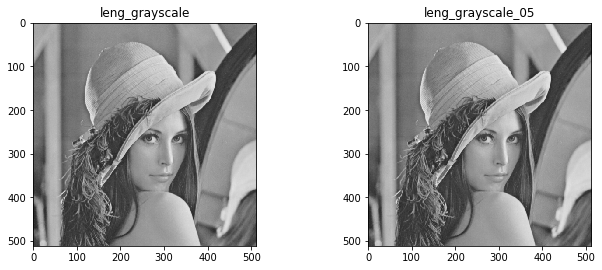

In [4]:
#사진저장
cv2.imwrite('./data/lena_grayscale.png',img2)

#사진 저장시 읽어온 사진과 다른 Format이여도 가능하고 영상의 품질 또한 0 ~ 100사이로 지정할 수 있다.
#Default는 95이다.
cv2.imwrite('./data/lena_grayscale_05.png',img2,[cv2.IMWRITE_PNG_COMPRESSION,5])

#저장 사진 확인
img4 = cv2.imread('./data/lena_grayscale.png')
img5 = cv2.imread('./data/lena_grayscale_05.png')


plt.figure(figsize=(10,10))

leng_grayscale = plt.subplot(1,2,1)
leng_grayscale.set_title('leng_grayscale')
plt.imshow(img4)

leng_grayscale_05 = plt.subplot(1,2,2)
leng_grayscale_05.set_title('leng_grayscale_05')
plt.imshow(img5)

plt.subplots_adjust(wspace=0.5)
plt.show()

### 비디오 프레임 캡쳐와 화면 표시

출처:<a href="https://karl27.tistory.com/95">karl27 블로그</a>  
출처: <a href="https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html">ipywidget 정식 홈페이지</a><br>
JupyterNotebook에서는 ii를 누르게 되면 Keyboard Interrupt가 걸리게 된다.

In [5]:
cap = cv2.VideoCapture('./data/test.mp4') 
frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size=',frame_size)

wImg = widgets.Image(layout = widgets.Layout(border="solid") ) 
display.display(wImg) 
if cap.isOpened(): 
    ret, img = cap.read() 
    while ret: 
        try:
            # 동영상 파일에서 캡쳐된 이미지를 이미지 파일 스트림으로 다시 인코딩을 한다. 
            tmpStream = cv2.imencode(".jpeg", img)[1].tostring() 
            wImg.value = tmpStream 
            # 20 프레임이 되기 위한 딜레이 다만, 실제로 입력한 것보다 조금 더 딜레이가 있다 
            time.sleep(0.05) 
            ret, img = cap.read()
        except KeyboardInterrupt:
            break
            
cap.release()

frame_size= (1280, 720)


Image(value=b'', layout="Layout(border='solid')")

In [6]:
from ipywidgets import Layout, Button, Box, VBox, Label


cap = cv2.VideoCapture('./data/test.mp4') 
frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size=',frame_size)

fourcc = cv2.VideoWriter_fourcc(*'DVIX')

out1 = cv2.VideoWriter('./data/record0.mp4',fourcc,20.0,frame_size)
out2 = cv2.VideoWriter('./data/record1.mp4',fourcc,20.0,frame_size,isColor = False)

items_layout = Layout( width='auto')     # override the default width of the button to 'auto' to let the button grow

box_layout = Layout(display='flex',
                    flex_flow='row',
                    border='solid',
                   width='100%',)

wImg1 = widgets.Image(layout = widgets.Layout(border="solid"), width="50%") 
wImg2 = widgets.Image(layout = widgets.Layout(border="solid"), width="50%") 

items = [wImg1, wImg2]
box = Box(children=items)

display.display(box) 

while True:
    try:
        retval, frame = cap.read()
        if not retval:
            break
        
        out1.write(frame)
        tmpStream = cv2.imencode(".jpeg", frame)[1].tostring()
        wImg1.value = tmpStream
    
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        out2.write(gray)
    
        tmpStream = cv2.imencode(".jpeg", gray)[1].tostring()
        wImg2.value = tmpStream
    
    except KeyboardInterrupt:
        break
            
cap.release()

frame_size= (1280, 720)


Box(children=(Image(value=b'', layout="Layout(border='solid')", width='50%'), Image(value=b'', layout="Layout(…